In [14]:
import pandas as pd


In [19]:
dzom = pd.read_csv('D:/Roumyajit Dutta/STP in Anaconda/ZOMATO.csv')



In [20]:
dzom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       755 non-null    object 
 1   Open       755 non-null    float64
 2   High       755 non-null    float64
 3   Low        755 non-null    float64
 4   Close      755 non-null    float64
 5   Adj Close  755 non-null    float64
 6   Volume     755 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.4+ KB


In [21]:
dzom=pd.read_csv('ZOMATO.csv')

In [81]:
dzom.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
750,2024-08-07,261.529999,267.600006,251.809998,265.670013,265.670013,127379201
751,2024-08-08,265.000000,267.500000,260.000000,265.589996,265.589996,57917059
752,2024-08-09,267.730011,272.899994,265.549988,267.089996,267.089996,52601958
753,2024-08-12,263.500000,266.489990,261.350006,263.429993,263.429993,33514964
754,2024-08-13,265.000000,265.399994,256.000000,257.079987,257.079987,26127109


In [65]:
dzom['Date']=pd.to_datetime(dzom['Date'])

In [60]:
dzom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       755 non-null    datetime64[ns]
 1   Open       755 non-null    float64       
 2   High       755 non-null    float64       
 3   Low        755 non-null    float64       
 4   Close      755 non-null    float64       
 5   Adj Close  755 non-null    float64       
 6   Volume     755 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.4 KB


In [23]:
dzom1=dzom.reset_index()['Close']

In [24]:
dzom1.shape

(755,)

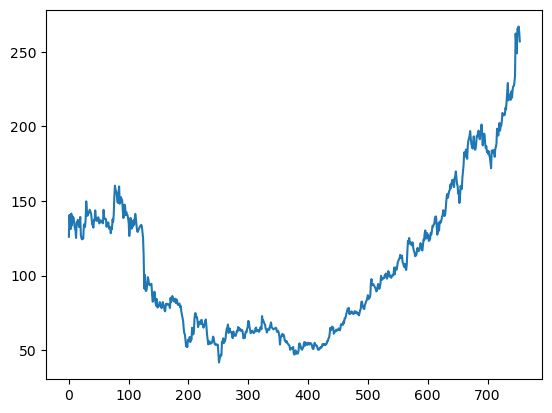

In [26]:
import matplotlib.pyplot as plt
plt.plot(dzom1)

In [27]:
import numpy as np

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dzom1 = scaler.fit_transform(np.array(dzom1).reshape(-1,1))

In [30]:
dzom1.shape

(755, 1)

In [31]:
training_size=int(len(dzom1)*0.65)
test_size=len(dzom1)-training_size
train_data,test_data=dzom1[0:training_size,:],dzom1[training_size:len(dzom1),:1]


In [33]:
len(train_data),len(test_data)

(490, 265)

In [37]:
def create_dataset(dataset,timestep=1):
    dataX,dataY =[] ,[] 
    for i in range (len(dataset)-timestep-1):
        a=dataset[i:(i+timestep),0]
        dataX.append(a)
        dataY.append(dataset[i+timestep,0])
    return np.array(dataX),np.array(dataY)    

In [38]:
timestep=100
X_train, Y_train=create_dataset(train_data,timestep)
X_test, ytest=create_dataset(test_data,timestep)

In [39]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [43]:
!pip install tensorflow




In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [45]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\roumy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.fit(X_train,Y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 961ms/step - loss: 0.0126 - val_loss: 0.0687
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - loss: 0.0026 - val_loss: 0.1008
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 400ms/step - loss: 0.0020 - val_loss: 0.0184
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 504ms/step - loss: 0.0018 - val_loss: 0.0311
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 322ms/step - loss: 0.0013 - val_loss: 0.0112
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 275ms/step - loss: 0.0011 - val_loss: 0.0282
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 300ms/step - loss: 9.7609e-04 - val_loss: 0.0203
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 289ms/step - loss: 0.0010 - val_loss: 0.0187
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 293ms/step - loss: 8.7251e-04 - val_loss: 0.0133
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step - loss: 9.5194e-04 - val_loss: 0.0137
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 309ms/step - loss: 8.8940e-04 - val_loss: 0.0133
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms

In [48]:
import tensorflow as tf

In [49]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [50]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [51]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))


72.23719013351874

In [52]:
math.sqrt(mean_squared_error(ytest,test_predict))


176.22170898663435

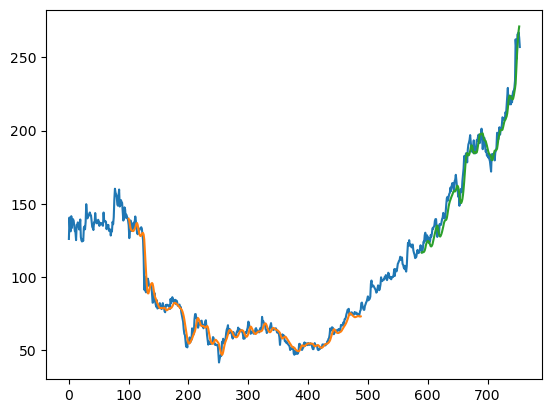

In [68]:
look_back=100
trainPredictPlot=np.empty_like(dzom1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
testPredictPlot=np.empty_like(dzom1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(dzom1)-1,:]=test_predict
plt.plot(scaler.inverse_transform(dzom1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [69]:
len(test_data)

265

In [71]:
x_input=test_data[165:].reshape(1,-1)
x_input.shape

(1, 100)

In [72]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [73]:
#demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while (i<30):
    if (len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{}day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{}day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)
    




[1.0070397]
101
1day input [0.51721079 0.51588005 0.54981373 0.56777855 0.58796131 0.62522182
 0.61124911 0.62300394 0.63364976 0.62743971 0.606148   0.64473919
 0.66026438 0.6660309  0.67445883 0.68865328 0.66736164 0.6505057
 0.6422995  0.63675479 0.65449787 0.67290635 0.64673527 0.63320616
 0.6345369  0.64961856 0.67401529 0.67201914 0.68222143 0.69020583
 0.68333037 0.66447835 0.68222143 0.68133429 0.70817071 0.67712032
 0.64606993 0.66691804 0.68111249 0.67956001 0.65405433 0.63808553
 0.64385204 0.6265525  0.62987933 0.62078605 0.62854865 0.61635028
 0.60991836 0.59350603 0.57820263 0.63054473 0.62987933 0.63143187
 0.62327008 0.63152061 0.61213625 0.63560151 0.64136802 0.65188078
 0.69570621 0.68931869 0.67556777 0.69761356 0.71247341 0.69020583
 0.70306954 0.70488822 0.72001421 0.74272533 0.73984211 0.73540634
 0.73598301 0.73757982 0.75811746 0.75283888 0.77843329 0.80207596
 0.83170687 0.77998584 0.79386976 0.78619589 0.798483   0.78184886
 0.80660046 0.78805891 0.81161284 0.

In [78]:
len(dzom1)

755

In [75]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [76]:
import matplotlib.pyplot as plt


In [77]:
dzom3=dzom1.tolist()
dzom3.extend(lst_output)

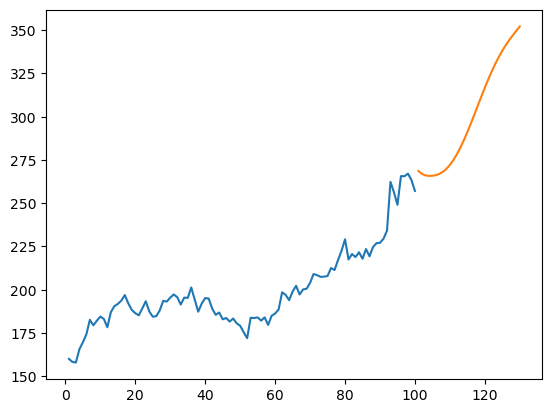

In [80]:
plt.plot(day_new,scaler.inverse_transform(dzom1[655:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))